# Análise de texto de fontes desestruturadas e Web

## Aula 02 - PDFs

Nesta aula iremos trabalhar com extração de informações a partir de PDFs utilizando bibliotecas do Python.

## O que são arquivos PDF?

O PDF, ou *Portable Document Format*, é um formato de arquivo criado pela Adobe em 1993. O principal objetivo em utilizar um PDF envolve permitir que um documento seja lido de forma independente do hardware ou sistema operacional utilizado pelo usuário. Também, sem a necessidade de possuir instalado o programa utilizado para criar o documento.

<img src="https://atd-insper.s3.us-east-2.amazonaws.com/aula02/pdf_adobe.jpg">

Documentos PDF são padronizados conforme a ISO 32000. Os arquivos PDF geralmente incluem:
- informações textuais
- imagens vetoriais
- imagens bitmap

Eles são distribuídos principalmente com foco em leitura, ou seja, ao criar um DOC no Microsoft Word, repassamos o `arquivo.DOCX` para pessoas que necessitem editá-lo.

Para as pessoas que apenas necessitam ler as informações do documento, transformamos o DOC em PDF e enviamos neste formato!


## Qual a importância de extrair informações de PDFs?

Arquivos PDF são criados com foco principal sendo a interação entre organizações e pessoas (uma cria, a outra lê).

Em um cenário ideal, as informações contidas no PDF também estariam disponíveis em um ambiente estruturado e de fácil recuperação (ex: sistema de gerenciamento de banco de dados). Entretanto, muitas vezes a única forma disponível para acessos aos dados é o próprio arquivo PDF, por exemplo: editais, relatórios governamentais, lista de lojas, relatórios de desempenho, etc.

Nesta aula, iremos aprender como extrair informações de PDFs, tabulares ou não. Além disso, veremos como utilizar recursos do Python para armazenar e analisar estes dados.

## Biblioteca *camelot*
Para os dados tabulares, a principal biblioteca que utilizaremos será a camelot (https://camelot-py.readthedocs.io/en/master/).
Para utilizá-la, será necessário instalar algumas dependências. Como você está utilizando o **Google Colab**, execute os seguintes comandos (execute esta célula):

In [2]:
!pip install ghostscript
!pip install camelot-py[cv]
!pip install excalibur-py
!pip install 'PyPDF2<3.0'
!apt install ghostscript python3-tk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 93.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 KB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.6/405.6 KB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 KB 966.

Lembra-se de executar o import novamente quando instalar bibliotecas!

## Importando as bibliotecas necessárias

Aqui, iremos importar as bibliotecas que utilizaremos na aula

In [3]:
import os
import pandas as pd
import numpy as np
import camelot
import missingno as mn
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

Caso obtenha algum erro, utilize o **!pip install** para instalar a biblioteca ausente!

In [4]:
# Exemplo (remover # da proxima linha se preciso)
# !pip install missingno

Vamos conferir em qual diretório estamos executando o notebook?

In [5]:
print('O seu notebook está no diretório')
print(os.getcwd())

O seu notebook está no diretório
/content



## Lendo um PDF

Para realizar a leitura dos dados tabulares, vamos utilizar a biblioteca **camelot**:

In [6]:
pdf_path = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula02/stores.pdf'
tabelas = camelot.read_pdf(pdf_path)
tabelas

<TableList n=1>

Podemos ver que encontramos uma tabela no documento.

Agora, vamos conferir o *parsing report* do *camelot* para esta tabela:

In [7]:
print(tabelas[0].parsing_report)

{'accuracy': 100.0, 'whitespace': 8.17, 'order': 1, 'page': 1}


E podemos obter um *DataFrame* do *pandas* com os dados desta tabela:

Depois iremos aprender o que mais podemos fazer com este DataFrame!

In [8]:
df = tabelas[0].df
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,"9,893.24",20,"12,942.78",16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,"4,048.26",16,"7,095.50",145.92,10.69,0,1,4,
3,L03,Games e Info,São Paulo,"5,035.14",10,"6,602.59",25.53,4.46,1,1,3,
4,L04,Games e Info,São Paulo,"5,001.69",6,"3,455.80",13.77,6.30,1,0,4,
5,L05,Games e Info,São Paulo,"4,953.57",6,"3,515.88",13.87,2.09,0,0,1,
6,L06,Acessórios,São Paulo,"3,982.36",11,"4,009.59",80.24,5.82,1,0,4,
7,L07,Acessórios,São Paulo,"3,918.66",3,"4,041.81",73.04,2.05,0,0,4,
8,L08,Eletrônicos,São Paulo,"9,987.32",25,"9,948.98",12.29,0.35,1,0,3,
9,L09,Eletrônicos,Rio de Janeiro,"9,530.83",22,"8,963.34",11.17,5.48,1,0,4,


A funcionalidade de *read_pdf* do *camelot* permite especificar diversos parâmetros. Por exemplo, podemos ler apenas a página 2:

In [9]:
pdf_path = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula02/stores.pdf'
tabelas = camelot.read_pdf(pdf_path, pages = '2')
df_pg2 = tabelas[0].df
df_pg2

,0,1,2,3,4,5,6,7,8,9,10,11
0,L52,Eletrônicos,São Paulo,"10,002.37",30,"12,990.53",16.43,7.13,0,1,4,
1,L53,Eletrônicos,São Paulo,"10,129.94",24,"10,003.34",12.74,5.14,1,0,2,
2,L54,Acessórios,Rio de Janeiro,"3,458.45",8,"3,032.39",57.07,6.18,0,0,3,
3,L55,Games e Info,Rio de Janeiro,"4,533.89",10,"5,488.57",20.66,6.03,1,1,2,
4,L56,Games e Info,Rio de Janeiro,"4,549.74",7,"5,552.39",21.21,7.16,0,1,4,
5,L57,Games e Info,Brasília,"4,035.74",7,"5,983.45",22.36,9.14,1,1,3,
6,L58,Acessórios,Brasília,"3,020.23",12,"6,517.81",106.02,5.12,0,1,4,
7,L59,Games e Info,Brasília,"4,001.21",4,"3,001.76",11.36,6.18,1,0,4,
8,L60,Acessórios,São Paulo,"3,970.48",17,"7,144.34",105.23,2.08,0,1,3,
9,L61,Games e Info,São Paulo,"5,025.78",11,"6,440.72",25.55,7.27,1,1,4,


# Múltiplas tabelas em um mesmo arquivo

Imagem de exemplo com múltiplas tabelas em uma mesma página:
<img src="https://atd-insper.s3.us-east-2.amazonaws.com/aula02/relatorio_aula02.png">

In [10]:
pdf_path = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula02/relatorio.pdf'
tab_rep = camelot.read_pdf(pdf_path)
tab_rep

<TableList n=2>

Podemos perceber que foram encontradas duas tabelas no arquivo.

In [11]:
df_relat1 = tab_rep[0].df
df_relat1

,0,1,2,3
0,,Jan,Fev,Mar
1,Loja 1,5501,6031,7212
2,Loja 2,8007,8052,7301
3,Loja 3,6001,5041,8327


In [12]:
df_relat2 = tab_rep[1].df
df_relat2

,0,1,2,3,4
0,Vendedor,Loja,Jan,Fev,Mar
1,João S.,Loja 1,5501,6031,7212
2,Igor M.,Loja 2,8007,8052,7301
3,Celso T.,Loja 3,6001,5041,8327
4,Ana S.,Loja 1,5501,6031,7212
5,Tiago B.,Loja 2,8007,8052,7301
6,Helena W.,Loja 3,6001,5041,8327
7,José K.,Loja 1,5501,6031,7212
8,Bruna D.,Loja 2,8007,8052,7301
9,Vinicius G.,Loja 3,6001,5041,8327


Utilizando o report gráfico para analisar as extrações:

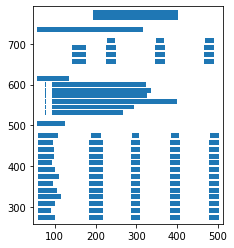

In [13]:
camelot.plot(tab_rep[1], kind='text').show()

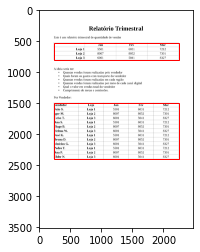

In [14]:
camelot.plot(tab_rep[0], kind='contour').show()

## Primeiro contato com o *pandas*

Agora, vamos aprender como utilizar recursos da biblioteca *pandas*.

In [15]:
pdf_path = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula02/stores.pdf'
tabelas = camelot.read_pdf(pdf_path, split_text=True, pages='1-end')
tabelas

<TableList n=2>

In [16]:
type(tabelas[0].df)

pandas.core.frame.DataFrame

Iremos concatenar dois DataFrames:

In [17]:
m = pd.merge(df_relat1, df_relat2, how = 'outer')
m

,0,1,2,3,4
0,,Jan,Fev,Mar,NaN
1,Loja 1,5501,6031,7212,NaN
2,Loja 2,8007,8052,7301,NaN
3,Loja 3,6001,5041,8327,NaN
4,Vendedor,Loja,Jan,Fev,Mar
5,João S.,Loja 1,5501,6031,7212
6,Igor M.,Loja 2,8007,8052,7301
7,Celso T.,Loja 3,6001,5041,8327
8,Ana S.,Loja 1,5501,6031,7212
9,Tiago B.,Loja 2,8007,8052,7301


podemos exibir apenas o início do nosso DataFrame, para não ter a tela toda poluída com dados

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,"9,893.24",20,"12,942.78",16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,"4,048.26",16,"7,095.50",145.92,10.69,0,1,4,
3,L03,Games e Info,São Paulo,"5,035.14",10,"6,602.59",25.53,4.46,1,1,3,
4,L04,Games e Info,São Paulo,"5,001.69",6,"3,455.80",13.77,6.30,1,0,4,


ou os últimos:

In [19]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
47,L47,Acessórios,Brasília,"2,996.18",8,"3,501.24",64.26,0.12,1,0,4,
48,L48,Eletrônicos,Brasília,"8,996.01",17,"9,522.54",11.58,2.97,1,0,4,
49,L49,Games e Info,Belo Horizonte,"4,001.27",5,"1,981.24",7.57,6.59,1,0,4,
50,L50,Acessórios,Belo Horizonte,"3,042.01",9,"5,483.42",110.27,2.79,0,1,2,
51,L51,Acessórios,Belo Horizonte,"3,026.23",14,"5,505.55",105.27,4.94,0,1,1,


é possível também especificar o número de linhas

In [20]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,"9,893.24",20,"12,942.78",16.50,3.91,0,1,1,


Perceberam que o nome das colunas ficou na primeira linha?

Vamos renomear as colunas do DataFrame:

In [21]:
df.columns = ['CodLoja', 'TipoLoja', 'Cidade', 'CustoOperacional','NumFunc', 'FatDia',
              'NumClientesDia', 'CustoAquiPorCli', 'LojaPropria', 'VendeOnline', 'Perfil', 'LojaCentro']
df.head(3)

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
0,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,"9,893.24",20,"12,942.78",16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,"4,048.26",16,"7,095.50",145.92,10.69,0,1,4,


e agora vamos remover a primeira linha

In [22]:
# Comando para remover a primeira linha aqui
df = df.drop(0)
df.head(3)

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,"9,893.24",20,"12,942.78",16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,"4,048.26",16,"7,095.50",145.92,10.69,0,1,4,
3,L03,Games e Info,São Paulo,"5,035.14",10,"6,602.59",25.53,4.46,1,1,3,


Agora, vamos conferir os tipos de dados das colunas.

In [23]:
df.dtypes

CodLoja             object
TipoLoja            object
Cidade              object
CustoOperacional    object
NumFunc             object
FatDia              object
NumClientesDia      object
CustoAquiPorCli     object
LojaPropria         object
VendeOnline         object
Perfil              object
LojaCentro          object
dtype: object

Vamos alterar as colunas numéricas:

In [24]:
df

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,"9,893.24",20,"12,942.78",16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,"4,048.26",16,"7,095.50",145.92,10.69,0,1,4,
3,L03,Games e Info,São Paulo,"5,035.14",10,"6,602.59",25.53,4.46,1,1,3,
4,L04,Games e Info,São Paulo,"5,001.69",6,"3,455.80",13.77,6.30,1,0,4,
5,L05,Games e Info,São Paulo,"4,953.57",6,"3,515.88",13.87,2.09,0,0,1,
6,L06,Acessórios,São Paulo,"3,982.36",11,"4,009.59",80.24,5.82,1,0,4,
7,L07,Acessórios,São Paulo,"3,918.66",3,"4,041.81",73.04,2.05,0,0,4,
8,L08,Eletrônicos,São Paulo,"9,987.32",25,"9,948.98",12.29,0.35,1,0,3,
9,L09,Eletrônicos,Rio de Janeiro,"9,530.83",22,"8,963.34",11.17,5.48,1,0,4,
10,L10,Acessórios,Rio de Janeiro,"3,595.69",15,"3,046.12",59.34,3.98,1,0,1,


In [25]:
df['CustoOperacional'] = df['CustoOperacional'].str.replace(',','').astype(float)
df['NumFunc'] = df['NumFunc'].astype(int)
df['FatDia'] = df['FatDia'].str.replace(',','').astype(float)
df['NumClientesDia'] = df['NumClientesDia'].astype(float)
df['CustoAquiPorCli'] = df['CustoAquiPorCli'].astype(float)

In [26]:
df.dtypes

CodLoja              object
TipoLoja             object
Cidade               object
CustoOperacional    float64
NumFunc               int64
FatDia              float64
NumClientesDia      float64
CustoAquiPorCli     float64
LojaPropria          object
VendeOnline          object
Perfil               object
LojaCentro           object
dtype: object

Agora, vamos definir as variáveis categóricas:

In [27]:
df['TipoLoja'] = df['TipoLoja'].astype('category')
df['Cidade'] = df['Cidade'].astype('category')

df['LojaPropria'] = df['LojaPropria'].astype('category')
df['VendeOnline'] = df['VendeOnline'].astype('category')
df['Perfil'] = df['Perfil'].astype('category')
df['LojaCentro'] = df['LojaCentro'].astype('category')

Assim, os tipos ficam:

In [28]:
df.dtypes

CodLoja               object
TipoLoja            category
Cidade              category
CustoOperacional     float64
NumFunc                int64
FatDia               float64
NumClientesDia       float64
CustoAquiPorCli      float64
LojaPropria         category
VendeOnline         category
Perfil              category
LojaCentro          category
dtype: object

O que temos até agora?!

In [29]:
df.head(2)

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,9893.24,20,12942.78,16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,4048.26,16,7095.50,145.92,10.69,0,1,4,


Quantas linhas (registros) e colunas?

In [30]:
df.shape

(51, 12)

### Filtrando dados
Vamos aprender como selecionar apenas parte dos registros?

Vamos selecionar apenas as lojas da cidade de São Paulo:

In [31]:
df.loc[df['Cidade'] == 'São Paulo']

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,9893.24,20,12942.78,16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,4048.26,16,7095.50,145.92,10.69,0,1,4,
3,L03,Games e Info,São Paulo,5035.14,10,6602.59,25.53,4.46,1,1,3,
4,L04,Games e Info,São Paulo,5001.69,6,3455.80,13.77,6.30,1,0,4,
5,L05,Games e Info,São Paulo,4953.57,6,3515.88,13.87,2.09,0,0,1,
6,L06,Acessórios,São Paulo,3982.36,11,4009.59,80.24,5.82,1,0,4,
7,L07,Acessórios,São Paulo,3918.66,3,4041.81,73.04,2.05,0,0,4,
8,L08,Eletrônicos,São Paulo,9987.32,25,9948.98,12.29,0.35,1,0,3,
33,L33,Games e Info,São Paulo,4915.13,10,3449.18,14.19,4.38,1,0,4,
34,L34,Eletrônicos,São Paulo,10090.02,14,9948.74,12.17,5.43,1,0,3,


Agora, selecione apenas as lojas de Acessórios:

In [32]:
df.loc[df['TipoLoja'] == 'Acessórios']

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
2,L02,Acessórios,São Paulo,4048.26,16,7095.50,145.92,10.69,0,1,4,
6,L06,Acessórios,São Paulo,3982.36,11,4009.59,80.24,5.82,1,0,4,
7,L07,Acessórios,São Paulo,3918.66,3,4041.81,73.04,2.05,0,0,4,
10,L10,Acessórios,Rio de Janeiro,3595.69,15,3046.12,59.34,3.98,1,0,1,
14,L14,Acessórios,Rio de Janeiro,3469.57,8,2975.24,61.01,1.44,0,0,2,
15,L15,Acessórios,Rio de Janeiro,3560.35,11,2950.75,67.19,4.88,0,,2,
18,L18,Acessórios,Brasília,3002.45,11,6457.83,125.78,6.72,1,1,1,
22,L22,Acessórios,Brasília,3006.73,12,3439.24,85.07,6.50,0,0,1,
23,L23,Acessórios,Brasília,3007.95,10,3437.89,72.61,0.18,0,0,2,
26,L26,Acessórios,Belo Horizonte,3042.13,11,5510.36,97.85,7.79,1,1,3,


Vamos trazer apenas as colunas TipoLoja e FatDia da cidade de São Paulo:

In [33]:
filtro_linhas = df['Cidade'] == 'São Paulo'
df.loc[filtro_linhas, ['TipoLoja', 'FatDia']]

,TipoLoja,FatDia
1,Eletrônicos,12942.78
2,Acessórios,7095.50
3,Games e Info,6602.59
4,Games e Info,3455.80
5,Games e Info,3515.88
6,Acessórios,4009.59
7,Acessórios,4041.81
8,Eletrônicos,9948.98
33,Games e Info,3449.18
34,Eletrônicos,9948.74


Agora, apenas as lojas com faturamento diário acima de 12.000,00:

In [34]:
df.loc[df['FatDia'] > 12000]

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,9893.24,20,12942.78,16.50,3.91,0,1,1,
37,L37,Eletrônicos,Rio de Janeiro,9539.08,22,12120.64,15.28,7.24,0,1,2,


E as lojas de Acessórios que vendem até  3000?

**Atenção!** Se está filtrando por duas colunas, sempre utilize parênteses para envolver os critérios `( ) & ( )`

In [35]:
df.loc[(df['FatDia'] <= 3000) & (df['TipoLoja'] == 'Acessórios')]

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
14,L14,Acessórios,Rio de Janeiro,3469.57,8,2975.24,61.01,1.44,0,0,2,
15,L15,Acessórios,Rio de Janeiro,3560.35,11,2950.75,67.19,4.88,0,,2,
35,L35,Acessórios,Rio de Janeiro,3501.30,9,2963.19,65.22,3.33,0,0,3,
42,L42,Acessórios,Rio de Janeiro,3547.89,11,2950.96,52.99,3.02,0,0,2,


E somente as colunas Cidade e CustoOperacional, mas mantendo todas as linhas?

In [36]:
df.loc[:, ['Cidade', 'CustoOperacional']]

,Cidade,CustoOperacional
1,São Paulo,9893.24
2,São Paulo,4048.26
3,São Paulo,5035.14
4,São Paulo,5001.69
5,São Paulo,4953.57
6,São Paulo,3982.36
7,São Paulo,3918.66
8,São Paulo,9987.32
9,Rio de Janeiro,9530.83
10,Rio de Janeiro,3595.69


## Análise exploratória

Agora, vamos utilizar alguns recursos de estatística e bibliotecas de visualização para conhecermos um pouco melhor os nossos dados.

### Verificando *missing values*

É comum que as bases tenham valores faltantes. Vamos conferir se alguma coluna possui valores faltantes:

In [37]:
df

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,LojaCentro
1,L01,Eletrônicos,São Paulo,9893.24,20,12942.78,16.50,3.91,0,1,1,
2,L02,Acessórios,São Paulo,4048.26,16,7095.50,145.92,10.69,0,1,4,
3,L03,Games e Info,São Paulo,5035.14,10,6602.59,25.53,4.46,1,1,3,
4,L04,Games e Info,São Paulo,5001.69,6,3455.80,13.77,6.30,1,0,4,
5,L05,Games e Info,São Paulo,4953.57,6,3515.88,13.87,2.09,0,0,1,
6,L06,Acessórios,São Paulo,3982.36,11,4009.59,80.24,5.82,1,0,4,
7,L07,Acessórios,São Paulo,3918.66,3,4041.81,73.04,2.05,0,0,4,
8,L08,Eletrônicos,São Paulo,9987.32,25,9948.98,12.29,0.35,1,0,3,
9,L09,Eletrônicos,Rio de Janeiro,9530.83,22,8963.34,11.17,5.48,1,0,4,
10,L10,Acessórios,Rio de Janeiro,3595.69,15,3046.12,59.34,3.98,1,0,1,


Existe toda uma literatura e técnicas que podem ser utilizadas em *missing imputation*.

Primeiro, vamos conferir se eles existem:

In [38]:
df.isna().sum()

CodLoja             0
TipoLoja            0
Cidade              0
CustoOperacional    0
NumFunc             0
FatDia              0
NumClientesDia      0
CustoAquiPorCli     0
LojaPropria         0
VendeOnline         0
Perfil              0
LojaCentro          0
dtype: int64

Estranho, não?

Consegue identificar por que isto acontece?

R:Os elementos são strings e nao nulos

Vamos substituir as strings vazias por NaN (not a number)

In [39]:
df.replace('', np.nan, inplace=True)

In [40]:
df.dtypes

CodLoja               object
TipoLoja            category
Cidade              category
CustoOperacional     float64
NumFunc                int64
FatDia               float64
NumClientesDia       float64
CustoAquiPorCli      float64
LojaPropria         category
VendeOnline         category
Perfil              category
LojaCentro          category
dtype: object

E contar os missings novamente:

In [41]:
df.isna().sum()

CodLoja              0
TipoLoja             0
Cidade               0
CustoOperacional     0
NumFunc              0
FatDia               0
NumClientesDia       0
CustoAquiPorCli      0
LojaPropria          0
VendeOnline          3
Perfil               0
LojaCentro          48
dtype: int64

Vamos utilizar a biblioteca *missingno* para produzir algo mais visual?!

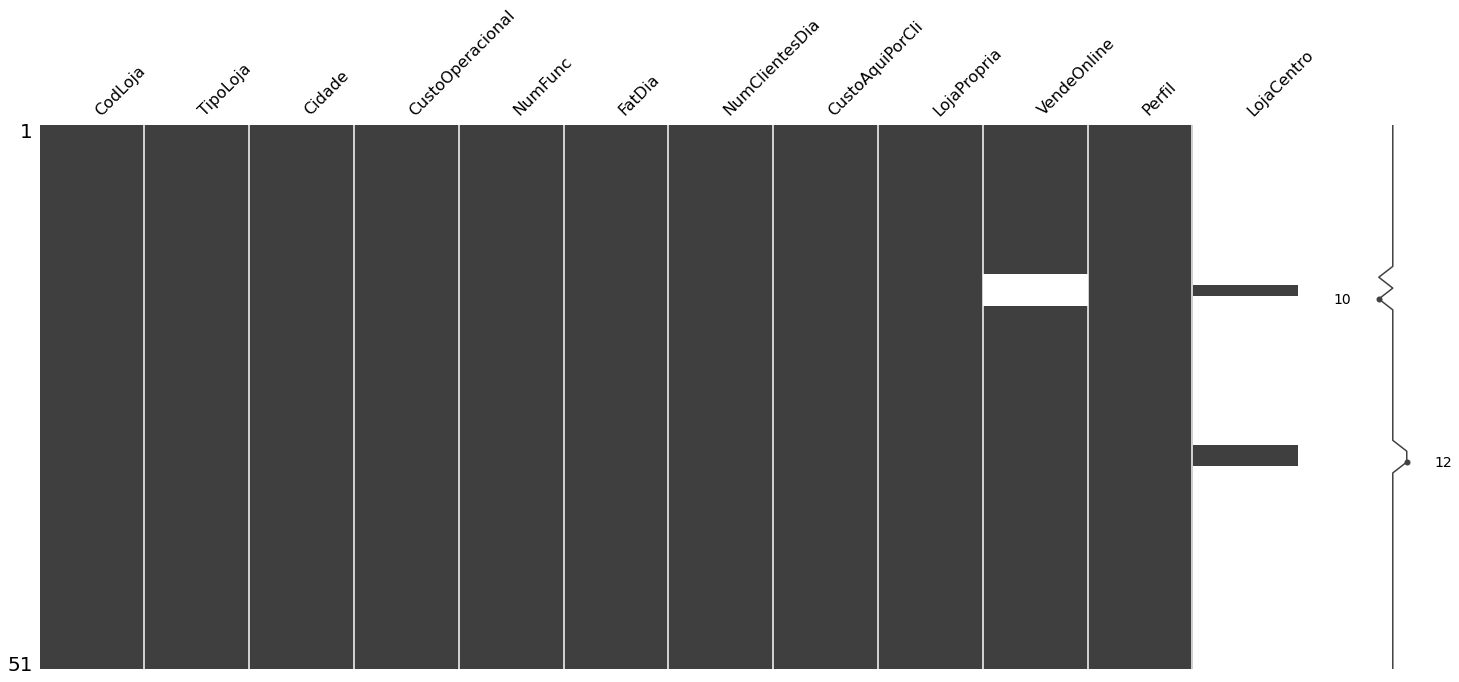

In [42]:
mn.matrix(df)

Quais colunas possuem missings?

R: Loja Centro

Como podemos corrigir?!

remove

Vamos remover de nossa análise a última coluna:

In [43]:
df = df.drop(columns=['LojaCentro'])
df.head()

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil
1,L01,Eletrônicos,São Paulo,9893.24,20,12942.78,16.50,3.91,0,1,1
2,L02,Acessórios,São Paulo,4048.26,16,7095.50,145.92,10.69,0,1,4
3,L03,Games e Info,São Paulo,5035.14,10,6602.59,25.53,4.46,1,1,3
4,L04,Games e Info,São Paulo,5001.69,6,3455.80,13.77,6.30,1,0,4
5,L05,Games e Info,São Paulo,4953.57,6,3515.88,13.87,2.09,0,0,1


E arbitrariamente preencher os missings em VendeOnline com 1:

In [44]:
df.loc[df['VendeOnline'].isna(), 'VendeOnline'] = '1'

Conferindo os missings novamente:

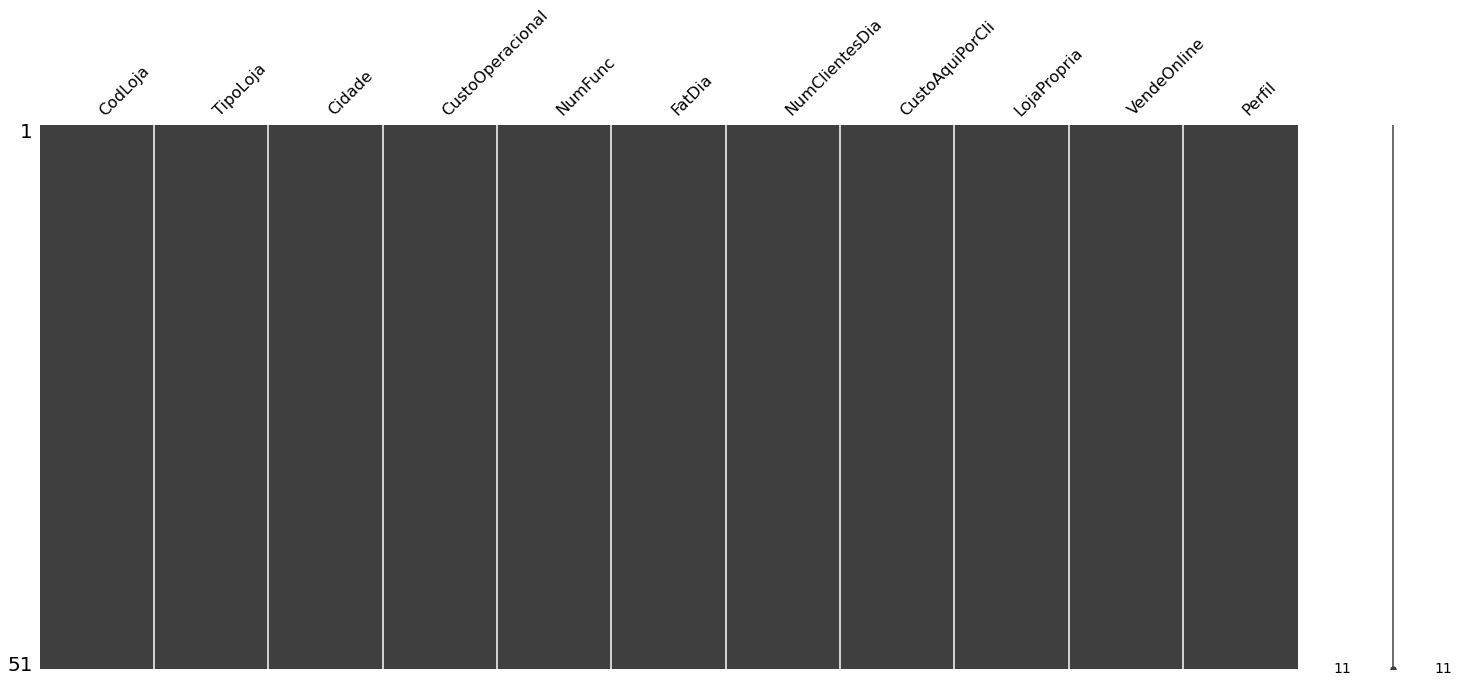

In [45]:
mn.matrix(df)

### Ordenando os dados

Como conseguimos ordenar os dados?

In [46]:
df.sort_values(by='Cidade')

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil
26,L26,Acessórios,Belo Horizonte,3042.13,11,5510.36,97.85,7.79,1,1,3
49,L49,Games e Info,Belo Horizonte,4001.27,5,1981.24,7.57,6.59,1,0,4
32,L32,Eletrônicos,Belo Horizonte,9087.42,24,11521.47,14.37,8.01,1,1,4
31,L31,Acessórios,Belo Horizonte,2966.77,12,5519.87,115.48,5.88,0,1,1
30,L30,Acessórios,Belo Horizonte,2995.99,9,5490.35,109.00,5.04,0,1,3
29,L29,Games e Info,Belo Horizonte,4006.37,7,4970.17,19.43,7.19,0,1,2
28,L28,Games e Info,Belo Horizonte,4019.81,9,4949.32,18.82,7.33,1,1,3
27,L27,Games e Info,Belo Horizonte,3999.32,10,4979.04,19.65,2.83,0,1,4
50,L50,Acessórios,Belo Horizonte,3042.01,9,5483.42,110.27,2.79,0,1,2
25,L25,Eletrônicos,Belo Horizonte,9011.65,24,8527.92,10.68,6.47,0,0,3


Será que conseguimos ordenar pelo faturamento em ordem crescente?

In [47]:
df.sort_values(by='FatDia', ascending=True)

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil
49,L49,Games e Info,Belo Horizonte,4001.27,5,1981.24,7.57,6.59,1,0,4
13,L13,Games e Info,Rio de Janeiro,4454.46,4,2448.07,9.71,0.36,0,0,1
11,L11,Games e Info,Rio de Janeiro,4435.76,8,2462.53,9.24,3.21,1,0,2
12,L12,Games e Info,Rio de Janeiro,4491.96,1,2568.48,10.54,0.68,0,0,4
15,L15,Acessórios,Rio de Janeiro,3560.35,11,2950.75,67.19,4.88,0,1,2
43,L43,Games e Info,Brasília,3985.99,8,2950.84,12.02,1.28,0,0,2
42,L42,Acessórios,Rio de Janeiro,3547.89,11,2950.96,52.99,3.02,0,0,2
35,L35,Acessórios,Rio de Janeiro,3501.30,9,2963.19,65.22,3.33,0,0,3
14,L14,Acessórios,Rio de Janeiro,3469.57,8,2975.24,61.01,1.44,0,0,2
21,L21,Games e Info,Brasília,3988.16,7,2982.56,11.69,3.11,1,0,3


Será que conseguimos ordenar pelo faturamento em ordem decrescente?

In [48]:
df.sort_values(by='FatDia', ascending=False)

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil
1,L01,Eletrônicos,São Paulo,9893.24,20,12942.78,16.50,3.91,0,1,1
37,L37,Eletrônicos,Rio de Janeiro,9539.08,22,12120.64,15.28,7.24,0,1,2
32,L32,Eletrônicos,Belo Horizonte,9087.42,24,11521.47,14.37,8.01,1,1,4
8,L08,Eletrônicos,São Paulo,9987.32,25,9948.98,12.29,0.35,1,0,3
34,L34,Eletrônicos,São Paulo,10090.02,14,9948.74,12.17,5.43,1,0,3
24,L24,Eletrônicos,Brasília,8988.92,20,9534.84,11.94,5.86,0,0,2
48,L48,Eletrônicos,Brasília,8996.01,17,9522.54,11.58,2.97,1,0,4
17,L17,Eletrônicos,Brasília,9031.83,17,9492.90,12.09,0.44,0,1,3
41,L41,Eletrônicos,Rio de Janeiro,9463.76,17,9053.25,11.11,6.34,1,0,4
40,L40,Eletrônicos,Rio de Janeiro,9516.92,21,9003.72,11.10,2.41,1,0,2


### Criando tabelas de frequência

Conseguimos contar as ocorrências? Por exemplo, e se quiséssemos saber quantas lojas existem em cada cidade?

In [49]:
df['Cidade'].value_counts()

Rio de Janeiro    16
Brasília          14
Belo Horizonte    11
São Paulo         10
Name: Cidade, dtype: int64

E se quisessemos saber a porcentagem de lojas em cada cidade?

In [50]:
df['Cidade'].value_counts(normalize=True)

Rio de Janeiro    0.313725
Brasília          0.274510
Belo Horizonte    0.215686
São Paulo         0.196078
Name: Cidade, dtype: float64

**Exercício 1** Qual a porcentagem de lojas que são de Eletrônicos?

In [51]:
list(df['TipoLoja'].value_counts(normalize=True))[2]

0.2549019607843137

**Exercício 2** Considerando apenas São Paulo, qual a porcentagem de lojas que são de Eletrônicos?

In [52]:
df.loc[(df.Cidade=='São Paulo'), 'TipoLoja'].value_counts(normalize=True)

Games e Info    0.4
Acessórios      0.3
Eletrônicos     0.3
Name: TipoLoja, dtype: float64

Podemos exibir a tabela de frequências de forma gráfica?

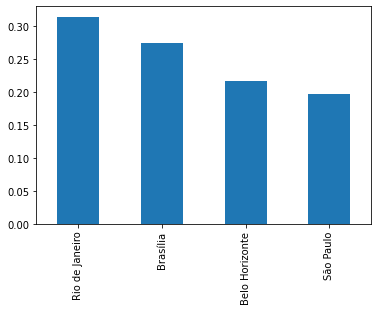

In [53]:
cont = df['Cidade'].value_counts(normalize=True)
cont.plot.bar()

In [54]:
cont

Rio de Janeiro    0.313725
Brasília          0.274510
Belo Horizonte    0.215686
São Paulo         0.196078
Name: Cidade, dtype: float64

In [55]:
cont.reset_index()

,index,Cidade
0,Rio de Janeiro,0.313725
1,Brasília,0.274510
2,Belo Horizonte,0.215686
3,São Paulo,0.196078


In [56]:
dados = cont.reset_index()

px.bar(dados, x='index', y='Cidade',
       color='index', labels={'index': 'Cidade'},
       title='Freq. Loja por Cidade')

### Medidas Resumo

E se quiséssemos saber a média de faturamento por dia?

In [57]:
df['FatDia'].mean()

5817.7682352941165

E os valores máximo, mínimo e mediana?!

In [58]:
df['FatDia'].max()

12942.78

In [59]:
df['FatDia'].min()

1981.24

In [60]:
df['FatDia'].median()

5505.55

Podemos resumir estas estatísticas em um único comando:

In [61]:
df.describe()

,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,5220.880000,12.254902,5817.768235,45.726471,4.443922
std,2558.841605,5.955982,2842.187368,41.217935,3.006598
min,2955.580000,1.000000,1981.240000,7.570000,0.120000
25%,3514.590000,8.000000,3438.565000,12.055000,2.525000
50%,4001.270000,11.000000,5505.550000,23.060000,4.380000
75%,7012.030000,15.500000,7811.710000,72.825000,6.320000
max,10090.020000,25.000000,12942.780000,145.920000,15.690000


### Distribuição

Faz sentido realizar uma contagem na variável de Faturamento?

Podemos analisar a distribuição.

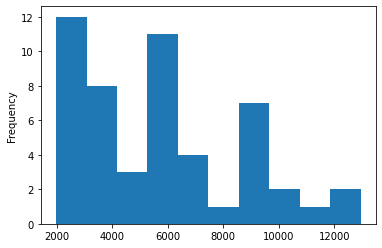

In [62]:
df['FatDia'].plot.hist()

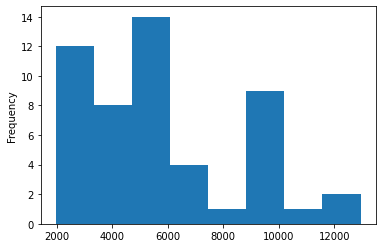

In [63]:
df['FatDia'].plot.hist(bins=8)

In [64]:
px.histogram(df['FatDia'],
             labels={'value': 'Faturamento'},
             title = 'Distribuição do faturamento')

In [65]:
df_hist = df.loc[:, ['TipoLoja', 'FatDia']]

px.histogram(df_hist, x = 'FatDia',
             color='TipoLoja', opacity=0.75)

E como plotar diversos gráficos na mesma célula?

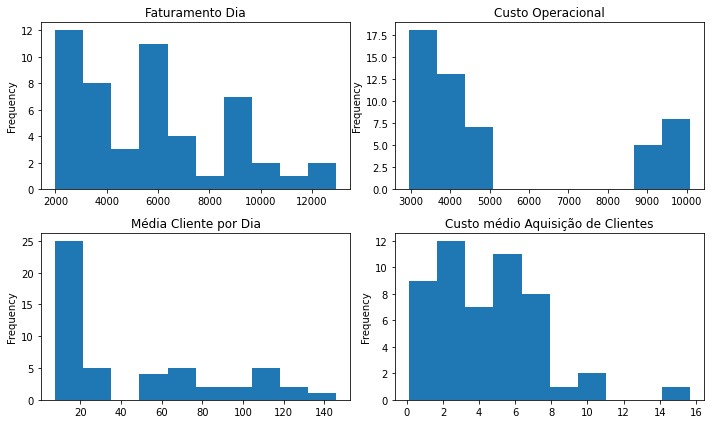

In [66]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
df['FatDia'].plot.hist()
plt.title('Faturamento Dia')

plt.subplot(2, 2, 2)
df['CustoOperacional'].plot.hist()
plt.title('Custo Operacional')

plt.subplot(2, 2, 3)
df['NumClientesDia'].plot.hist()
plt.title('Média Cliente por Dia')

plt.subplot(2, 2, 4)
df['CustoAquiPorCli'].plot.hist()
plt.title('Custo médio Aquisição de Clientes')

plt.tight_layout()
plt.show()



### Agrupamentos

Como podemos descobrir o Faturamento médio?

In [67]:
df['FatDia'].mean()

5817.7682352941165

E para descobrir o faturamento médio por Tipo de Loja?

In [68]:
group_df =  df.groupby(by='TipoLoja')['FatDia'].mean()
group_df

TipoLoja
Acessórios      4566.492857
Eletrônicos     9966.808462
Games e Info    4190.665882
Name: FatDia, dtype: float64

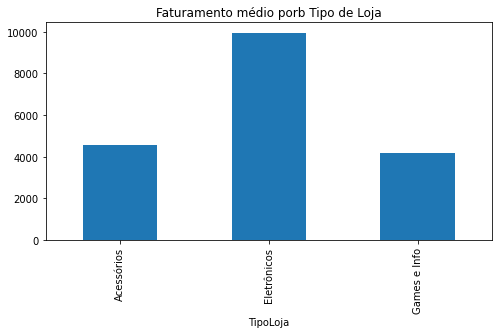

In [69]:
fig = plt.figure(figsize=(8, 4))
group_df.plot.bar()
plt.title('Faturamento médio porb Tipo de Loja')
plt.show()

**Exercício 3** Descubra o custo médio de aquisição de cliente para lojas que vendem e não vendem online.

In [70]:
#df
df.groupby(by='VendeOnline')['CustoAquiPorCli'].mean()

VendeOnline
0    3.414074
1    5.602500
Name: CustoAquiPorCli, dtype: float64

**Exercício 4** Descubra o faturamento médio para lojas que são e não são próprias.

In [71]:
df.groupby(by='LojaPropria')['FatDia'].mean()

LojaPropria
0    5680.912593
1    5971.730833
Name: FatDia, dtype: float64

### Tabelas cruzadas

E se quiséssemos realizar contagens de forma a considerar duas variáveis. Por exemplo, contar por Venda Online e Tipo de Loja?

Neste caso, temos uma situação de análise **bivariada** de variáveis qualitativas:

In [72]:
ct = pd.crosstab(df['TipoLoja'], df['VendeOnline'])
ct

VendeOnline,0,1
TipoLoja,,
Acessórios,10,11
Eletrônicos,8,5
Games e Info,9,8


Podemos utilizar o **normalize** para normalizar para frequência relativa nas linhas, colunas ou toda a tabela cruzada.

Veja mais na documentação https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [73]:
ct = pd.crosstab(df['TipoLoja'], df['VendeOnline'], normalize='columns')
ct

VendeOnline,0,1
TipoLoja,,
Acessórios,0.370370,0.458333
Eletrônicos,0.296296,0.208333
Games e Info,0.333333,0.333333


Estes zeros e uns ficam estranhos, não?! Vamos renomear as categorias!

In [74]:
df['VendeOnline'] = df['VendeOnline'].cat.rename_categories({'0': 'Não', '1': 'Sim'})
df['LojaPropria'] = df['LojaPropria'].cat.rename_categories({'0': 'Não', '1': 'Sim'})
df.head()

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil
1,L01,Eletrônicos,São Paulo,9893.24,20,12942.78,16.50,3.91,Não,Sim,1
2,L02,Acessórios,São Paulo,4048.26,16,7095.50,145.92,10.69,Não,Sim,4
3,L03,Games e Info,São Paulo,5035.14,10,6602.59,25.53,4.46,Sim,Sim,3
4,L04,Games e Info,São Paulo,5001.69,6,3455.80,13.77,6.30,Sim,Não,4
5,L05,Games e Info,São Paulo,4953.57,6,3515.88,13.87,2.09,Não,Não,1


Agora, o crosstab fica melhor:

In [75]:
# o parâmetro normalize pode ser index, columns ou all
ct = pd.crosstab(df['TipoLoja'], df['VendeOnline'], normalize='columns')
ct

VendeOnline,Não,Sim
TipoLoja,,
Acessórios,0.370370,0.458333
Eletrônicos,0.296296,0.208333
Games e Info,0.333333,0.333333


**Exercício 5** Crie:

a) uma alternativa para analisar como os tipos de lojas se distribuem pelas cidades.

In [76]:
pd.crosstab(df['TipoLoja'], df['Cidade'], normalize='columns')

Cidade,Belo Horizonte,Brasília,Rio de Janeiro,São Paulo
TipoLoja,,,,
Acessórios,0.454545,0.357143,0.5000,0.3
Eletrônicos,0.181818,0.214286,0.3125,0.3
Games e Info,0.363636,0.428571,0.1875,0.4


b) Dentre as lojas de Eletrônicos, qual a porcentagem das lojas que está localizada no Rio de Janeiro?

R:31%

c) Dentre as lojas de Belo Horizonte, qual a porcentagem das lojas é do tipo Acessórios?

R:45%

### Correlação entre variáveis

Podemos analisar a correlação entre as variáveis utilizando uma funcionalide da biblioteca pandas:

In [77]:
corr = df.corr()

ou pelo uso da biblioteca seaborn:

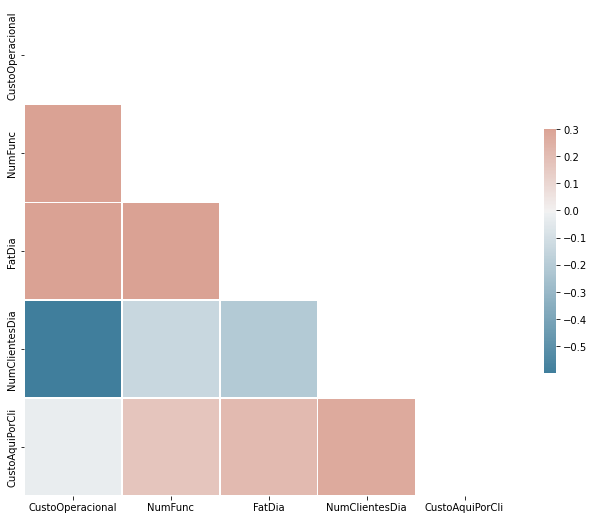

In [78]:
import seaborn as sns
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Ou pelo plotly express:

In [79]:
px.imshow(df.corr())

### Pivot Table

E se for necessário descobrir o faturamento médio de cada tipo de loja em cada cidade?

In [80]:
pivot = pd.pivot_table(df, index='TipoLoja', columns='Cidade',
               values=['FatDia'], aggfunc=np.mean)

pivot

FatDia                                          
Cidade       Belo Horizonte     Brasília Rio de Janeiro     São Paulo
TipoLoja                                                             
Acessórios        5501.9100  4672.704000    3734.547500   5048.966667
Eletrônicos      10024.6950  9516.760000    9625.668000  10946.833333
Games e Info      4219.9425  4976.503333    2493.026667   4255.862500

<Figure size 1296x360 with 0 Axes>

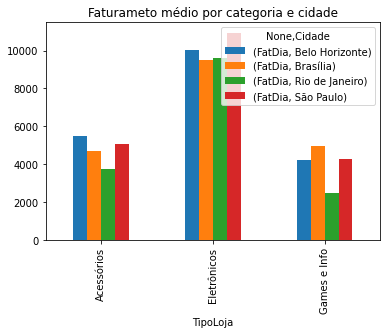

In [81]:
fig = plt.figure(figsize=(18, 5))
pivot.plot.bar()
plt.title('Faturameto médio por categoria e cidade')
plt.show()

In [82]:
pivot_aux = pivot.unstack().reset_index()
pivot_aux

,level_0,Cidade,TipoLoja,0
0,FatDia,Belo Horizonte,Acessórios,5501.910000
1,FatDia,Belo Horizonte,Eletrônicos,10024.695000
2,FatDia,Belo Horizonte,Games e Info,4219.942500
3,FatDia,Brasília,Acessórios,4672.704000
4,FatDia,Brasília,Eletrônicos,9516.760000
5,FatDia,Brasília,Games e Info,4976.503333
6,FatDia,Rio de Janeiro,Acessórios,3734.547500
7,FatDia,Rio de Janeiro,Eletrônicos,9625.668000
8,FatDia,Rio de Janeiro,Games e Info,2493.026667
9,FatDia,São Paulo,Acessórios,5048.966667


In [83]:
px.bar(pivot_aux, x='Cidade', y=0, color='TipoLoja', barmode='group')

In [84]:
px.bar(pivot_aux, x='Cidade', y=0, color='TipoLoja', barmode='stack')

### Criando colunas novas

Como podemos fazer para entender o ticket médio? Temos a média de clientes por dia e o faturamento por dia. Como obter o ticket médio?

In [85]:
df.head()

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil
1,L01,Eletrônicos,São Paulo,9893.24,20,12942.78,16.50,3.91,Não,Sim,1
2,L02,Acessórios,São Paulo,4048.26,16,7095.50,145.92,10.69,Não,Sim,4
3,L03,Games e Info,São Paulo,5035.14,10,6602.59,25.53,4.46,Sim,Sim,3
4,L04,Games e Info,São Paulo,5001.69,6,3455.80,13.77,6.30,Sim,Não,4
5,L05,Games e Info,São Paulo,4953.57,6,3515.88,13.87,2.09,Não,Não,1


In [86]:
df['TicketMedio'] = df['FatDia'] / df['NumClientesDia']
df.head()

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,TicketMedio
1,L01,Eletrônicos,São Paulo,9893.24,20,12942.78,16.50,3.91,Não,Sim,1,784.410909
2,L02,Acessórios,São Paulo,4048.26,16,7095.50,145.92,10.69,Não,Sim,4,48.625959
3,L03,Games e Info,São Paulo,5035.14,10,6602.59,25.53,4.46,Sim,Sim,3,258.620838
4,L04,Games e Info,São Paulo,5001.69,6,3455.80,13.77,6.30,Sim,Não,4,250.965868
5,L05,Games e Info,São Paulo,4953.57,6,3515.88,13.87,2.09,Não,Não,1,253.488104


E para criar categorias de custo? Abaixo de cinco mil é custo BAIXO, de cinco até oito é MÉDIO, acima de oito mil é ALTO?

In [87]:
def cat_custo(valor):
    if valor < 5000:
        return 'BAIXO'
    elif valor < 8000:
        return 'MEDIO'
    else:
        return 'ALTO'

In [88]:
df['CatCusto'] = df['CustoOperacional'].apply(cat_custo)
df.head()

,CodLoja,TipoLoja,Cidade,CustoOperacional,NumFunc,FatDia,NumClientesDia,CustoAquiPorCli,LojaPropria,VendeOnline,Perfil,TicketMedio,CatCusto
1,L01,Eletrônicos,São Paulo,9893.24,20,12942.78,16.50,3.91,Não,Sim,1,784.410909,ALTO
2,L02,Acessórios,São Paulo,4048.26,16,7095.50,145.92,10.69,Não,Sim,4,48.625959,BAIXO
3,L03,Games e Info,São Paulo,5035.14,10,6602.59,25.53,4.46,Sim,Sim,3,258.620838,MEDIO
4,L04,Games e Info,São Paulo,5001.69,6,3455.80,13.77,6.30,Sim,Não,4,250.965868,MEDIO
5,L05,Games e Info,São Paulo,4953.57,6,3515.88,13.87,2.09,Não,Não,1,253.488104,BAIXO


**Exercício 6** Conte quantas lojas estão em cada categoria de custo.

In [89]:
df['CatCusto'].value_counts()

BAIXO    36
ALTO     13
MEDIO     2
Name: CatCusto, dtype: int64

**Exercício 7** Calcule o faturamento médio por Categoria de custo.

In [90]:
df.groupby(by='CatCusto')['FatDia'].mean()

CatCusto
ALTO     9966.808462
BAIXO    4363.313333
MEDIO    5029.195000
Name: FatDia, dtype: float64

**Exercício 8** Cruze a categoria de custo com o tipo de loja para contar quantas estão em cada categoria conjunta.

In [91]:
pd.crosstab(df['CatCusto'], df['TipoLoja'])

TipoLoja,Acessórios,Eletrônicos,Games e Info
CatCusto,,,
ALTO,0,13,0
BAIXO,21,0,15
MEDIO,0,0,2


**Exercício 9** Cruze a categoria de custo com o tipo de loja, para descobrir o faturamento médio.

In [92]:
#pd.crosstab(df['CatCusto'], df['TipoLoja']).mean()
pd.pivot_table(df, index='CatCusto', columns='TipoLoja', values=['FatDia'], aggfunc=np.mean)

FatDia                          
TipoLoja   Acessórios  Eletrônicos Games e Info
CatCusto                                       
ALTO              NaN  9966.808462          NaN
BAIXO     4566.492857          NaN     4078.862
MEDIO             NaN          NaN     5029.195

**Exercício 10** Sugira categorias para o número de funcionários e clientes. Analise o faturamento médio.

In [93]:
# teria que criar categorias ligadas a intervalos ou limites. Posteriormente, analisava o faturamento.

**Exercício 11** Crie uma coluna de região geográfica.

In [94]:
# Cria uma lista ou dicionario com os estados de cada regiao
# percorre o df e acrescenta a paradinha 

# Exportar o DataFrame para arquivos

Será que conseguimos exportar o pandas DataFrame para algum arquivo?

Conseguimos sim!

Para exportar para Excel:

In [95]:
df.to_excel('lojas.xlsx')

e para CSV:

In [96]:
df.to_csv('lojas.csv')

# Extração de textos com PyPDF2

Caso o seu PDF contenha textos ao invés de tabelas, podemos utilizar o PyPDF2.

Vamos importar a biblioteca:

In [97]:
import PyPDF2 as pp
import urllib.request

Caso o import não seja realizado, descomente a próxima linha e faça a instalação

In [98]:
# !pip install PyPDF2

Vamos fazer o download do arquivo PDF

In [117]:
pdf_url = 'https://atd-insper.s3.us-east-2.amazonaws.com/aula02/ppc_computacao.pdf'

response = urllib.request.urlopen(pdf_url)

arq = open('ppc_computacao.pdf', 'wb')
arq.write(response.read())
arq.close()

e abrir o Arquivo

In [118]:
pp_reader = pp.PdfFileReader(open('ppc_computacao.pdf', 'rb')) 

Podemos buscar informações do documento, como o número de páginas

In [119]:
pp_reader.documentInfo

{'/CreationDate': "D:20190802180410-03'00'",
 '/ModDate': "D:20190802180410-03'00'",
 '/Producer': 'www.ilovepdf.com'}

In [120]:
print(f'O arquivo tem {pp_reader.numPages} páginas')

O arquivo tem 247 páginas


Ou ler uma página específica do PDF

In [121]:
texto = pp_reader.getPage(0).extractText()
print(texto)

 
  
 
 Insper  Instituto  de Ensino  e Pesquisa  
Portaria  MEC nº 915, de 06/07/2012, D.O.U. 09/07/2012  
 
 
 
 
 
 
 
INSPER INSTITUTO DE ENSINO E PESQUISA  
PPC - PROJETO PEDAGÓGICO DO CURSO   
ENGENHA RIA DE 
COMPUTAÇÃO  
 
 
 
 
 
 
 
 
 
Aprovado pelo Colegiado de Curso em 13/06/201 9. 


Vamos ler as 10 primeiras páginas, armazenando cada página em uma lista

In [122]:
lista_pg = []
for i in range(10):
    texto = pp_reader.getPage(i).extractText()
    lista_pg.append(texto)

Para uma melhor visualização, vamos podemos remover as quebras de linhas com **replace**

In [105]:
print(lista_pg[7].replace('\n', ''))

     7  Insper  Instituto  de Ensino  e Pesquisa  Portaria  MEC nº 915, de 06/07/2012, D.O.U. 09/07/2012  Apresentação                                                         Trata o presente do Projeto Pedagógico do Curso (PPC) do curso de graduação em ENGENHARIA DE COMPUTAÇÃO  do Insper Instituto de Ensino e Pesquisa, doravante denominado Insper.  Consubstancia -se em uma proposta curricular nas bases legais do sistema educativ o nacional e nos princípios norteadores do ensino superior, explicitados na LDB nº 9.394/96 e Resolução CNE/CES Nº 11, de 11 de Março de 2002 que institui as Diretrizes Curriculares Nacionais do curso de graduação em Engenharia, e dá outras providências.  Este documento apresenta os pressupostos teóricos, metodológicos e didático -pedagógicos estruturantes da proposta do curso em consonância com o Projeto Político -Pedagógico Institucional. Em todos os elementos estarão explicitados princípios, categorias e co nceitos que materializarão o processo de ensino e 

In [106]:
lista_pg[7].count('sistemas')

0

**Exercício 12** Leia todas as páginas do PDF `ppc_computacao.pdf` e armazene o conteúdo em uma lista.

In [125]:
lista_pg = []
for i in range(pp_reader.numPages):
  texto = pp_reader.getPage(i).extractText()
  lista_pg.append(texto)

**Exercício 13** Para cada página, faça algumas limpezas:
- Remova stop-words
- Remova quebras de linhas
- Remova pontuações

In [133]:
lista_pg = []
for i in range(pp_reader.numPages):
  texto = pp_reader.getPage(i).extractText()
  lista_pg.append(texto.replace('\n', '').replace('.', '').replace(',', '').replace(':', '').replace('-', ''))

**Exercício 14** Crie uma função que retorne todas as páginas do PDF `ppc_computacao.pdf` que contém uma determinada palavra passada como parâmetro

In [ ]:
def find_word(word):
  lista_pg = []
  for i in range(pp_reader.numPages):
    texto = pp_reader.getPage(i).extractText()
    if texto.count(word)>0:
      lista_pg.append(texto)
  return lista_pg
  

**Exercício 15** Crie uma função que retorne todas as páginas onde uma palavra ou termo ocorre, além disso, deve retornar a quantidade.

Dica: utilizar uma lista com tuplas ou dicionário.

In [ ]:
def count_word(word):
  lista_pg = []
  for i in range(pp_reader.numPages):
    texto = pp_reader.getPage(i).extractText()
    if texto.count(word)>0:
      lista_pg.append([texto, texto.count(word)])
  return lista_pg

# Alternativas:

Algumas outras bibliotecas que podem ser utilizadas para extração de textos de PDFs:

- tabula-py
- tika
- xpdf-python

# Links interessantes da documentação do Camelot:
- https://camelot-py.readthedocs.io/en/master/user/how-it-works.html#lattice
- https://camelot-py.readthedocs.io/en/master/user/quickstart.html#read-the-pdf
- https://camelot-py.readthedocs.io/en/master/user/advanced.html#detect-short-lines
- https://camelot-py.readthedocs.io/en/master/user/faq.html#does-camelot-work-with-image-based-pdfs